# PyTorch Computer Vision
![](image/03-computer-vision-problems.png)

Aòcune delle librerie di compure vision:
| PyTorch module | What does it do?|
|----------------|-----------------|
| `torchvision` | Contains datasets, model architectures and image transformations often used for computer vision problems.|
| `torchvision.datasets` | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains a series of base classes for making custom datasets.|
| `torchvision.models` | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems.|
| `torchvision.transforms` | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here.|
| `torch.utils.data.Dataset` | Base dataset class for PyTorch.|
| `torch.utils.data.DataLoader` | Creates a Python iterable over a dataset (created with torch.utils.data.Dataset).|


## Input and outputs shape
![](image/03_inputs_outputs.png)

## What is a Convolutional Neural Network (CNN)
![](image/03_CNN.jpg)
Una CNN, o Rete Neurale Convoluzionale, è un tipo di architettura di deep learning progettata specificamente per elaborare dati strutturati a griglia, come le immagini. Le CNN sono caratterizzate da:

- **Strati di convoluzione**: Applicano filtri (o kernel) all'immagine di input per estrarre caratteristiche come bordi, texture e forme.
- **Condivisione dei parametri**: I filtri utilizzano gli stessi pesi in diverse posizioni dell'immagine, riducendo significativamente il numero di parametri rispetto alle reti neurali tradizionali.
- **Invarianza alla traslazione**: La capacità di riconoscere oggetti indipendentemente dalla loro posizione nell'immagine.
- **Strati di pooling**: Riducono la dimensionalità spaziale (larghezza e altezza) attraverso operazioni come max pooling o average pooling, mantenendo le informazioni più importanti.
- **Gerarchia di caratteristiche**: Gli strati più profondi catturano caratteristiche più astratte e complesse partendo da quelle più semplici dei primi strati.

Le CNN hanno rivoluzionato il campo della visione artificiale e vengono utilizzate in numerose applicazioni come riconoscimento di immagini, classificazione, rilevamento di oggetti, segmentazione semantica, e si sono dimostrate efficaci anche in altri domini come l'elaborazione del linguaggio naturale e l'analisi di serie temporali.

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.7.0
0.22.0


# 1 Getting a dataset
FashionMNIST, è tipo l'hello world in computer vision.

In [2]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(), # how do we want transfor the data?
    target_transform=None # how do we want transfor the targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(), # how do we want transfor the data?
    target_transform=None # how do we want transfor the targets?
)

100.0%
100.0%
100.0%
100.0%


In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [8]:
# See the first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [11]:
# Check the shape of our image
print(f"Image Shape: {image.shape} -> [color_channels, height, width]")
print(f"Image Label: {label} -> {class_names[label]}")


Image Shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image Label: 9 -> Ankle boot


## 1.2 Visualizing our data

Image Shape: torch.Size([1, 28, 28])


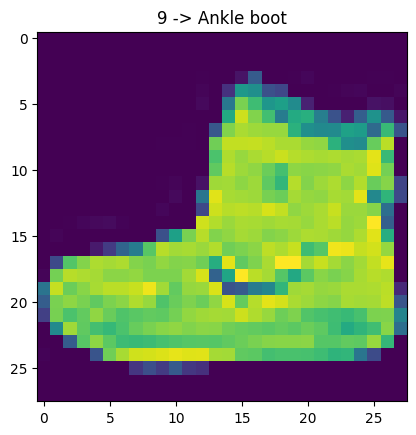

In [19]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image Shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(f"{label} -> {class_names[label]}");


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

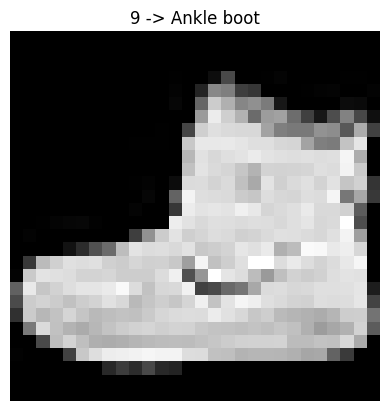

In [22]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"{label} -> {class_names[label]}");
plt.axis(False)

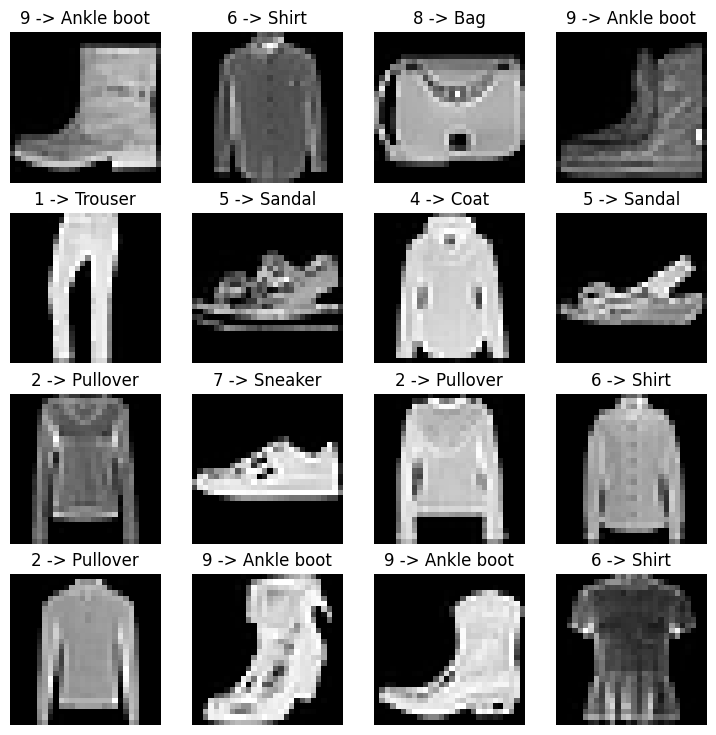

In [28]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(f"{label} -> {class_names[label]}");
    plt.axis(False)
    

In [30]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare Dataloader
Al momento i dati sono sottoforma di PyTorch Datasets.

Quindi dobbiamo usare `DataLoader` per converttire i dataset in un iterabile Python.
Vogliamo che siano in batches. In quanto non possiamo dare in pasto milioni di immmagini, perché esploderebbe il mac.

Questo rende la computazione più efficace e di solito usiamo un **batch_size=32**
Inoltre daremo più possibilità alla nostra rete neurale di **aggiornare i gradienti** durante le epoche.

In [31]:
from torch.utils.data import DataLoader

# setup batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x159c62ec0>,
 <torch.utils.data.dataloader.DataLoader at 0x159c62dd0>)

In [32]:
# Let's checkout what we've created

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x159c62ec0>, <torch.utils.data.dataloader.DataLoader object at 0x159c62dd0>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [37]:
# CHeck out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape # [BCHW] -> [BATCH, COLOR_CHANNELS, HEIGHT, WIDTH]

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


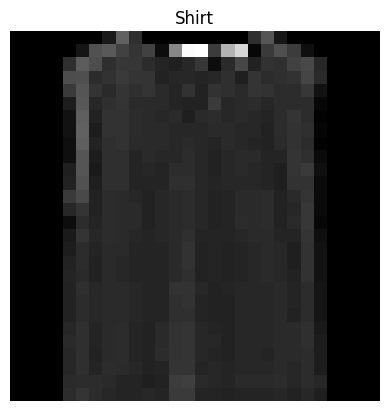

In [42]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image Size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")